#### Table of Contents
    1. Notebook SetUp
    2. Data Wrangling
    3. Time-series analysis: decomposition
    4. Testing for stationarity
    5. Stationarizing the happiness data

# 1. Notebook SetUp

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# File Pathway

path = r'/Volumes/RAID Volume/Data Analytics/6 Advanced Analytics & Dashboard Design/11-2022 World Happiness Report'

In [3]:
# Import Dataset

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'happy_clean3.pkl'))

# 2. Data Wrangling 

In [4]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,Economy GDP per Capita,Family Social Support,Health Life Expectancy,Freedom to Make Choices,Perceptions of Corruption,Generosity,Population 2020,Population 2019,Covid_Deaths,Happiness Category,Covid Status
0,Afghanistan,South Asia,2015,153,3.575,0.320,0.303,0.303,0.234,0.097,0.365,38928341,38041754,5.628,Low,Pre
1,Afghanistan,South Asia,2016,154,3.360,0.382,0.110,0.173,0.164,0.071,0.313,38928341,38041754,5.628,Low,Pre
2,Afghanistan,South Asia,2017,141,3.794,0.401,0.582,0.181,0.106,0.061,0.312,38928341,38041754,5.628,Low,Pre
3,Afghanistan,South Asia,2018,145,3.632,0.332,0.537,0.255,0.085,0.036,0.191,38928341,38041754,5.628,Low,Pre
4,Afghanistan,South Asia,2019,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,38928341,38041754,5.628,Low,Pre


In [5]:
# Our data is created by a yearly survey of 150 countries
# Create new column in proper date/time format

df['date'] = pd.to_datetime(df.Year.astype(str))

In [6]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,Economy GDP per Capita,Family Social Support,Health Life Expectancy,Freedom to Make Choices,Perceptions of Corruption,Generosity,Population 2020,Population 2019,Covid_Deaths,Happiness Category,Covid Status,date
0,Afghanistan,South Asia,2015,153,3.575,0.320,0.303,0.303,0.234,0.097,0.365,38928341,38041754,5.628,Low,Pre,2015-01-01
1,Afghanistan,South Asia,2016,154,3.360,0.382,0.110,0.173,0.164,0.071,0.313,38928341,38041754,5.628,Low,Pre,2016-01-01
2,Afghanistan,South Asia,2017,141,3.794,0.401,0.582,0.181,0.106,0.061,0.312,38928341,38041754,5.628,Low,Pre,2017-01-01
3,Afghanistan,South Asia,2018,145,3.632,0.332,0.537,0.255,0.085,0.036,0.191,38928341,38041754,5.628,Low,Pre,2018-01-01
4,Afghanistan,South Asia,2019,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,38928341,38041754,5.628,Low,Pre,2019-01-01


<AxesSubplot:ylabel='Frequency'>

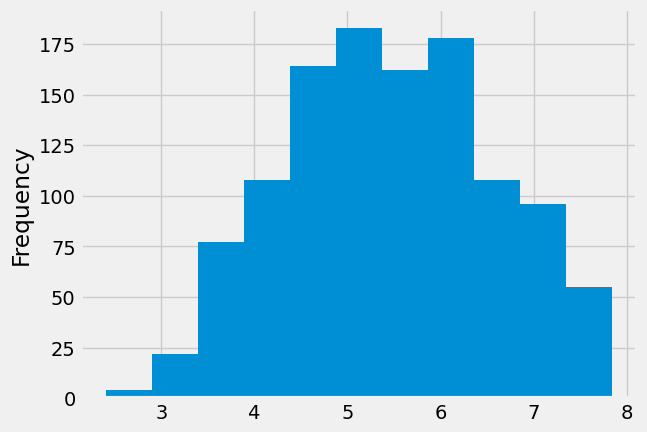

In [7]:
# Check for distribution

df['Happiness Score'].plot.hist(bins = 11)

#### Using normal distribution, moving forward with mean

In [8]:
# Creating a new dataframe with the mean happiness of all 150 countries grouped by date

df_2 = df.groupby('date').agg({'Happiness Score': ['mean']})

In [9]:
df_2

,Happiness Score
,mean
date,
2015-01-01,5.383535
2016-01-01,5.383352
2017-01-01,5.399070
2018-01-01,5.413028
2019-01-01,5.433171
2020-01-01,5.509811
2021-01-01,5.532839
2022-01-01,5.555462


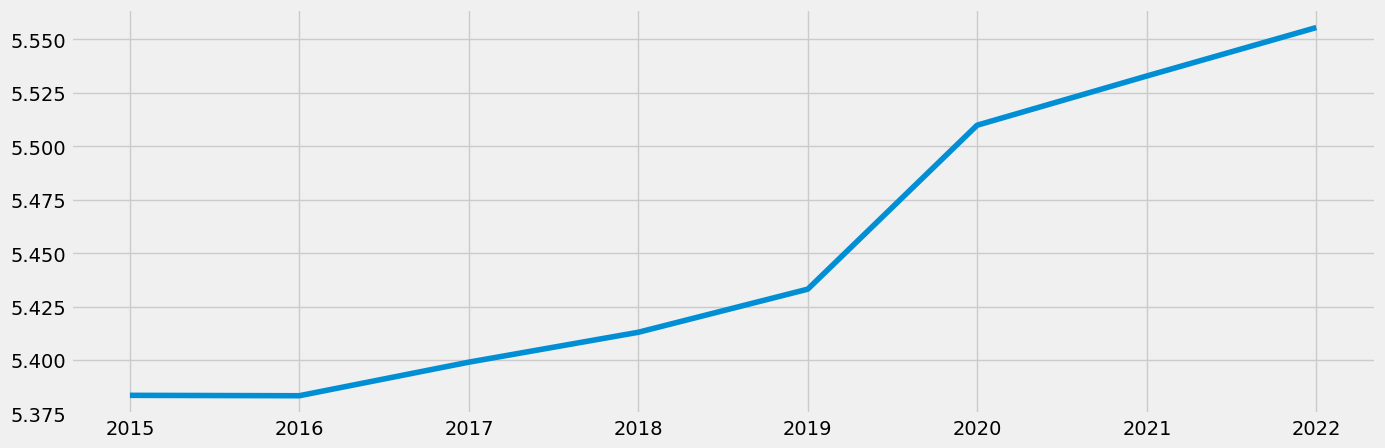

In [10]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2)

# 3. Time-series analysis: decomposition

In [11]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [12]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

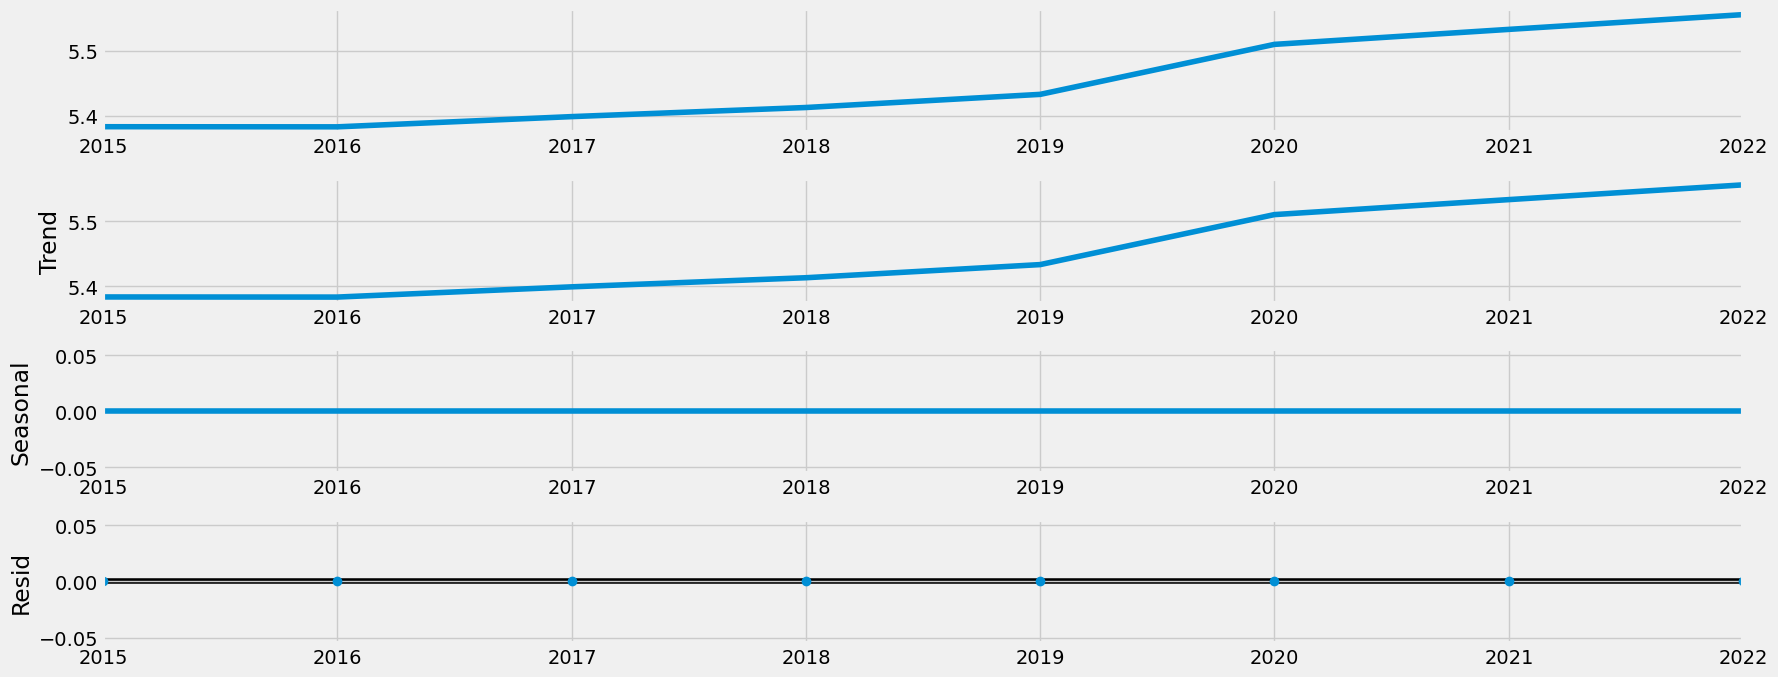

In [13]:
# Plot the separate components

decomposition.plot()
plt.show()

### Analysis
#### The decomposition does not reveal much insight which can be expected from the data collection method of yearly surveying countries 

# 4. Testing for stationarity


In [14]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2['Happiness Score'])

Dickey-Fuller Stationarity test:
Test Statistic                 0.465426
p-value                        0.983783
Number of Lags Used            0.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


The test statistic of 0.465 is larger than the critical value (5%) of -3.477, meaning the null hypothesis cannot be rejected. Data is non-stationary.

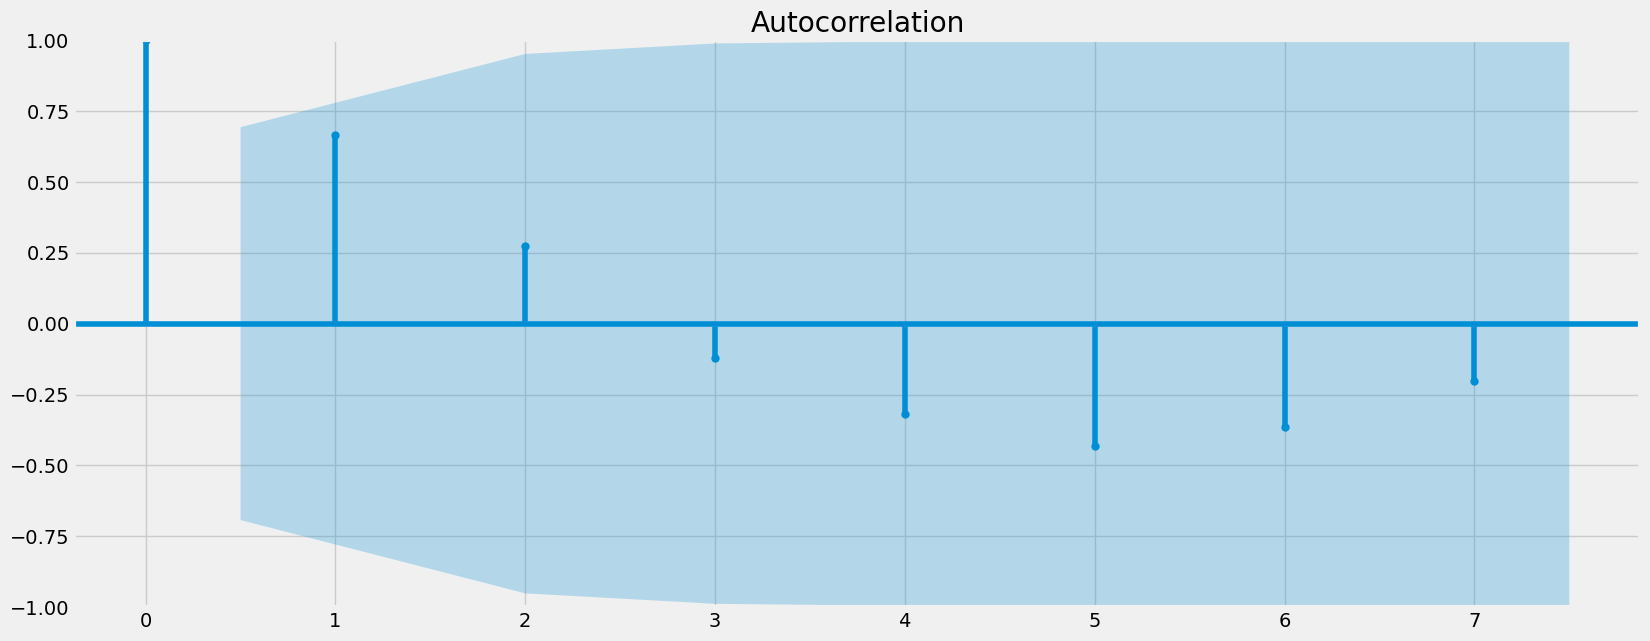

In [15]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_2)
plt.show()

The test reveals vertical lines over the blue margin of the confidence interval, proving that the data is non-stationary and the lags are highly connected with one another.

# 5. Stationarizing the Happiness Data


## Round 1

In [16]:
data_diff = df_2 - df_2.shift(1) 

In [17]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [18]:
data_diff.head()

,Happiness Score
,mean
date,
2016-01-01,-0.000183
2017-01-01,0.015718
2018-01-01,0.013958
2019-01-01,0.020143
2020-01-01,0.076640


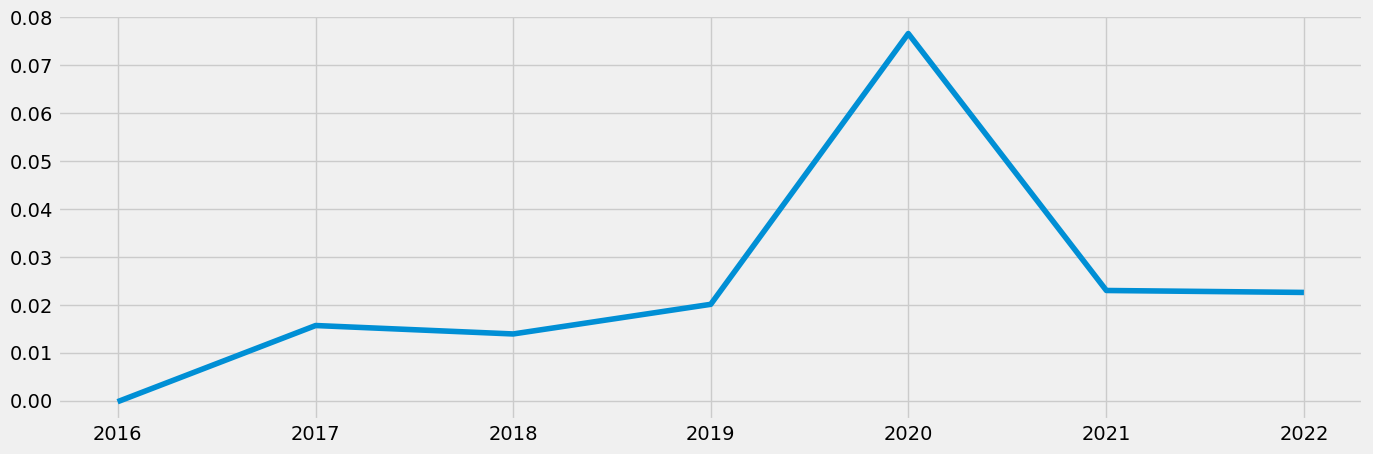

In [19]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [20]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.209191
p-value                        0.202927
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


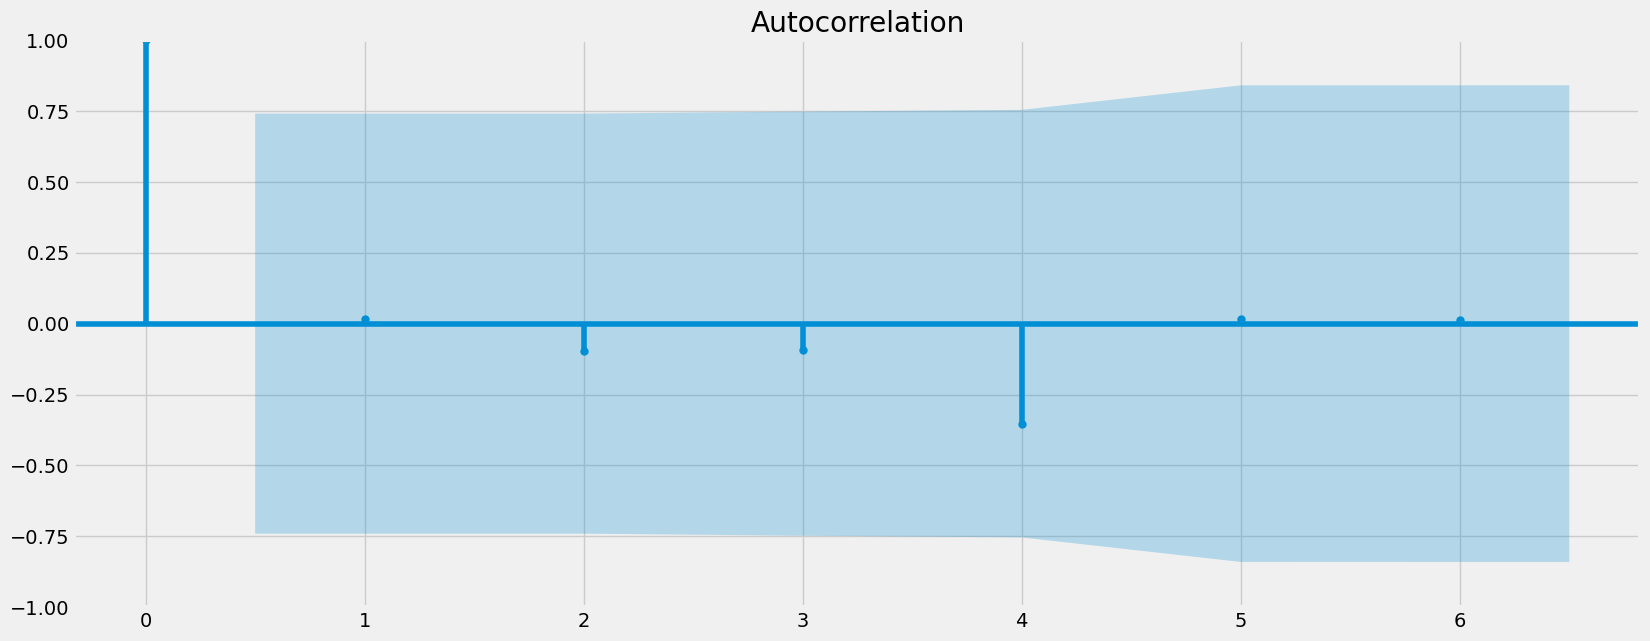

In [21]:
plot_acf(data_diff)
plt.show()

The results show that the data still not stationary. The test statistic of -2.209 is larger than the critical value (5%) of -3.646, meaning the null hypothesis can not be rejected.

## Round 2

In [22]:
data_diff_2 = data_diff - data_diff.shift(1) 

In [23]:
data_diff_2.dropna(inplace = True)

In [24]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.153955e+00
p-value                        3.089251e-10
Number of Lags Used            1.000000e+00
Number of Observations Used    4.000000e+00
Critical Value (1%)           -7.355441e+00
Critical Value (5%)           -4.474365e+00
Critical Value (10%)          -3.126933e+00
dtype: float64


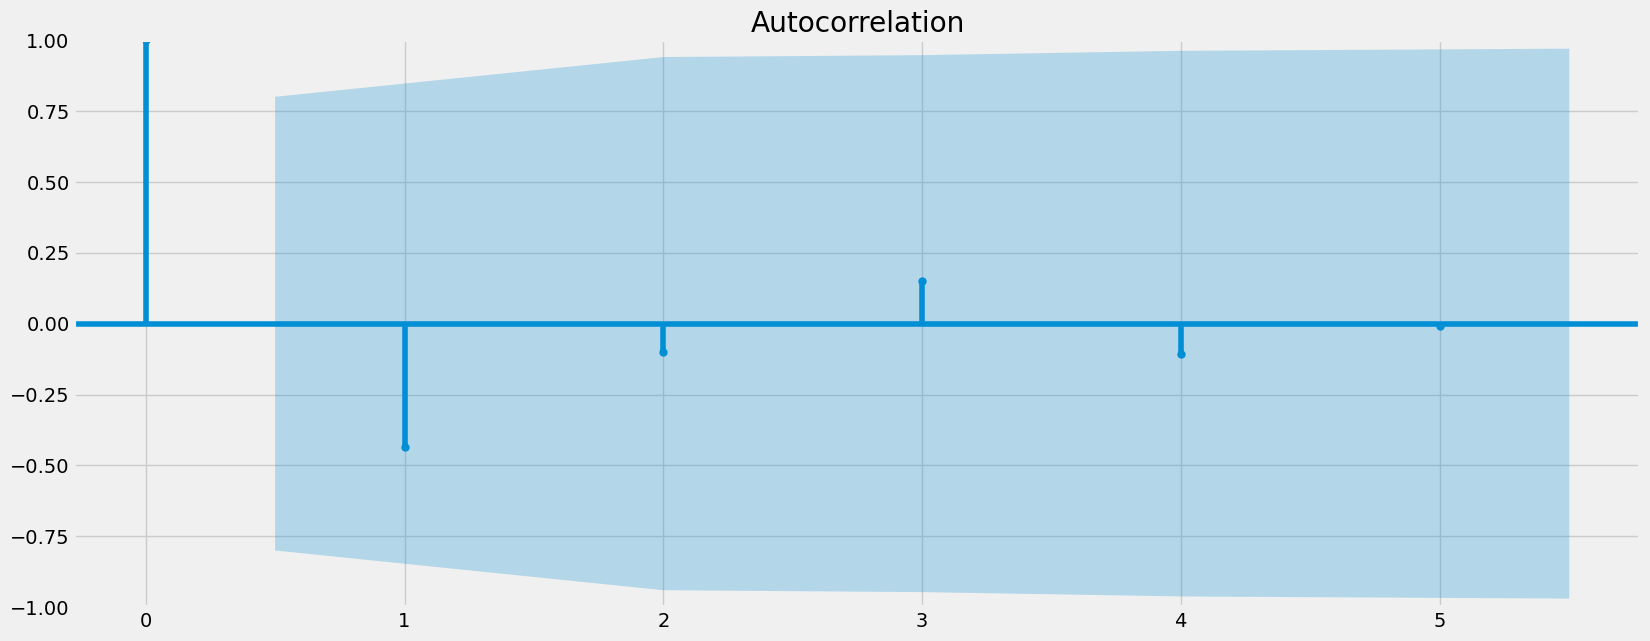

In [25]:
plot_acf(data_diff_2)
plt.show()

The results show that the data is now stationary. The test statistic of -7.153 is smaller than the critical value (5%) of -4.474, meaning the null hypothesis can be rejected.